# HW8 (60 points total)

This homework requires the cities.db file, found where you downloaded the homework.

# Problem 1:  Scraping Rotten Tomatoes (18 points:  8,6,4)

a, 8 points) Rotten Tomatoes is a website that aggregates movie critic reviews.  Use the requests module to get the Rotten Tomatoes review site for *Star Wars:  A New Hope*, at URL https://www.rottentomatoes.com/m/star_wars_a_new_hope/reviews?intcmp=rt-scorecard_tomatometer-reviews .  Then use Beautiful Soup to extract all 'p' tags with a class of 'review-text'.  Use Beautiful Soup's get_text() method to remove the tags from these text snippets, and store the resulting list of strings in a variable named "review_snippets."  Print this variable at the end of the code box.

**Optional**:  You don't have to use *Star Wars* as the movie for this exercise.  Feel free to use a different Rotten Tomatoes URL for your favorite movie.  But you need to use the Tomatometer page for the movie specifically; after you search for the movie, click on the link that says "[Number] reviews" beneath the tomato that indicates its freshness rating.  Compare to the Star Wars page to be sure your page has the right format.

In [ ]:
# TODO
import requests
import nltk
import gensim
import gensim.downloader as api
from bs4 import BeautifulSoup
page = requests.get('https://www.rottentomatoes.com/m/star_wars_a_new_hope/reviews?intcmp=rt-scorecard_tomatometer-reviews')
content = page.content
nltk.download('punkt')

soup = BeautifulSoup(content, 'html.parser')
tags = soup.find_all("p", class_="review-text")
review_snippet= []
for tag in tags:
  snippet = tag.get_text()
  review_snippet.append(snippet)
print(review_snippet)

['This film shines with its expedition outside of the sands of Tatooine...', "It's just-for-fun, comic-book science-fiction with some of the best special effects ever. ", 'Part of its appeal is as a boy’s own adventure set against a vast, dangerous cosmos – but the characters’ resistance to tyranny also accommodates much grounded critique of 20th-century US imperialism.', 'It’s mindless fun while it lasts. It scoots along as impatiently and recklessly as Luke himself.', '“Star Wars” was a rare phenomenon that blossomed into a beloved franchise whose popularity and influence can be seen across the globe regardless of age.', 'Star Wars is the best science fiction film that’s come down the pike to date. And every good thing you’ve heard about it is true.', 'The greatest kids\' picture for adults since "The Wizard of Oz."', 'Star Wars belongs on a short list of important films that have been so saturated into our minds, so ingrained and present in our everyday culture, that watching the fi

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
wv = api.load('word2vec-google-news-300')

b, 6 points) Write a function more_like_snippet_A(snippet, snippetA, snippetB, embedding) that does the following:

* Convert snippet, snippetA, and snippetB to vectors that are each the averages of their words' embeddings, using the word embedding argument.  You may copy, use, and/or modify find_avg_vector() from the NLP and ML lecture.

* Find the cosine of the angle between snippet and snippetA, as well as the cosine of the angle between snippet and snippetB.  You may copy, use, and/or modify find_cosine() from the NLP and ML lecture.

* If snippet and snippetA are closer in angle than snippet is to snippetB, return True.  Otherwise, return False.

In [ ]:
# TODO
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize

def find_avg_vector(txt, embedding):
  words = word_tokenize(txt)
  vec_sum = None
  count = 0
  for word in words:
    if word in embedding:
      count += 1
      if vec_sum is not None:
        vec_sum += embedding[word]
      else:
        # The embeddings are read-only unless you copy them
        vec_sum = embedding[word].copy()
  if vec_sum is None:
    return pd.Series(np.zeros((300,)))  # Treat no word found in embedding as zero vector
  return pd.Series(vec_sum/count)

def find_cosine(vec1, vec2):
  # Scale vectors to both have unit length
  unit_vec1 = vec1/np.linalg.norm(vec1)
  unit_vec2 = vec2/np.linalg.norm(vec2)
  # The dot product of unit vectors gives the cosine of their angle
  return np.dot(unit_vec1,unit_vec2)

def more_like_snippet_A(snippet, snippetA, snippetB, embedding):
  vec = find_avg_vector(snippet, wv)
  vecA = find_avg_vector(snippetA, wv)
  vecB = find_avg_vector(snippetB, wv)
  if find_cosine(vec, vecA) > find_cosine(vec, vecB):
    return True
  else:
    return False


c, 4 points) Print the result of applying more_like_snippet_A(snippet, "I love this movie", "I hate this movie") to each review snippet from part (a).  Estimate how accurate this sentiment analysis method is by reading the first five reviews and judging whether each True is considered Fresh (red tomato on the website) and each False is considered not Fresh (green splat on the website).

In [ ]:
# May need to !pip install gensim if working locally
# TODO
new_list = review_snippet[:5]
for snippet in new_list:
    result = more_like_snippet_A(snippet, "I love this movie", "I hate this movie", wv)
    print(result)

True
True
True
True
True


Estimated Accuracy: **TODO**


This seems correct when looking at the first five items of the list of ratings. The function got every one of them right. In comparison to whether they are get a fresh tomato or a rotton tomato, the function got them all right. The accuracy thus seems pretty good.

# Problem 2:  Price of Milk Interpolation (7 points)

The following y values represent the average price of a gallon of milk for each year. (Source: https://www.usinflationcalculator.com/inflation/milk-prices-adjusted-for-inflation/) Perform linear regression with scikit-learn's LinearRegression class.  Then plot the points alongside the linear fit.  And finally, make a prediction for 2023 with this linear model.

In [ ]:
import numpy as np
x = np.linspace(1995, 2021, 27)
y = [2.48, 2.62, 2.61, 2.70, 2.84,
     2.78, 2.88, 2.76, 2.76, 3.16, 3.19, 3.08, 3.50, 3.80, 3.11,
     3.26, 3.57, 3.49, 3.46, 3.69, 3.42, 3.20, 3.23, 2.90, 3.04,
     3.32, 3.55]

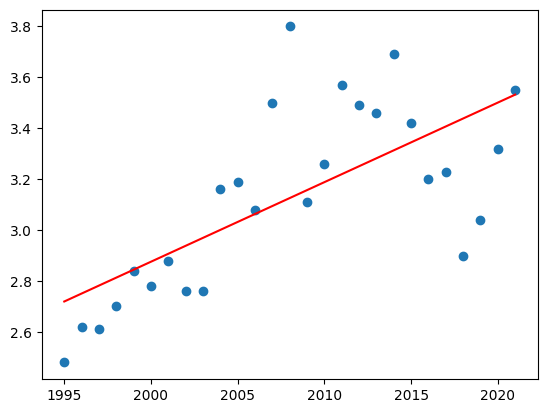

In [ ]:
# Fit and plot TODO
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
model = LinearRegression()
x_reshaped = np.array(x).reshape(-1, 1)
model.fit(x_reshaped, y)

plt.plot(x, model.predict(x_reshaped), color='red')
plt.scatter(x, y)

In [ ]:
# Prediction for 2023 TODO
future_year = 2023
prediction = model.predict([[future_year]])
print(prediction)

[3.59479039]


# Problem 3: SQLite Queries (10 points: 5,5)

For each text description of a query, make the corresponding query in SQLite (in Python).  Be sure to upload the cities.db file first.  This file contains two tables, the cities table containing "name" (of city) and "population", and the "best_cities" table, containing "city" and "reason" (one reason it's a good city, according to the AFAR website).

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving cities.db to cities.db


In [ ]:
import sqlite3
import pandas as pd
connection = sqlite3.connect('cities.db')

(a) (5 points) Query:  All the cities in the cities table that end in '-ton,' and their populations.




In [ ]:
# TODO
pd.read_sql("SELECT name, population FROM cities WHERE name LIKE '%ton'", connection)

,name,population
0,Arlington,332969
1,Arlington,174838
2,Boston,589141
3,Brockton,93653
4,Carrollton,109576
5,Charleston,89063
6,Compton,92864
7,Dayton,166179
8,Fullerton,126003
9,Hampton,146437


(b) (5 points) Query:  city name, reason it's a good city, and population, from an inner join of the two tables.  (This should produce 5 American cities.)

In [ ]:
# TODO
pd.read_sql('SELECT city, reason, population FROM best_cities INNER JOIN cities ON  best_cities.city = cities.name',connection)


,city,reason,population
0,Los Angeles,University,3694820
1,Chicago,Culture,2896016
2,San Francisco,Things to do,776733
3,Las Vegas,Attractions,478434
4,Washington,Attractions,572059


# Problem 4:  Advanced Pandas (15 points, 5, 5, 5)

Perform the requested transformations of the table below.


In [ ]:
import pandas as pd
import numpy as np

movies = pd.DataFrame({"Title": ["Turning Red",
                                 "Three Colours: Red",
                                 "Three Colours: Blue",
                                 "Three Colours: White",
                                 "Harold and Kumar Go to White Castle",
                                 "Men in Black",
                                 "Yellow Submarine"],
                       "Genre": ["Comedy","Drama","Drama","Drama","Comedy","Fantasy","Fantasy"],
                       "Year": [2022,1994,1994,1994,2004,1997,1968],
                       "Country": ["USA","France","France","France","USA","USA","UK"],
                       "RTScore": [95, 100, 98, 87, 74, 92, 95]})


(a) (5 points) Use groupby to find the mean score by genre.  Don't include averages of the year (use just the Genre and RTScore columns).

In [ ]:
# TODO
movies[["Genre", 'RTScore']].groupby(["Genre"]).mean()


,RTScore
Genre,
Comedy,84.5
Drama,95.0
Fantasy,93.5


(b) (5 points) Perform an outer join with the following table on movie title.  Then set the missing values in the "Animated" column to False, and finally, display the table.

In [ ]:
animated = pd.DataFrame({"Title": ["Turning Red",
                                 "Harold and Kumar Go to White Castle",
                                 "Men in Black",
                                 "Yellow Submarine",
                                 "Revolutionary Girl Utena",
                                 "End of Evangelion",
                                 "No",
                                 "Spirited Away"],
                         "Animated": [True,False,False,True,True,True,False,True]})

In [ ]:
# TODO

outer_merge = pd.merge(movies, animated, on="Title", how="outer")


outer_merge.Animated = outer_merge.Animated.fillna(False)

print(outer_merge)

                                  Title    Genre    Year Country  RTScore  \
0                           Turning Red   Comedy  2022.0     USA     95.0   
1                    Three Colours: Red    Drama  1994.0  France    100.0   
2                   Three Colours: Blue    Drama  1994.0  France     98.0   
3                  Three Colours: White    Drama  1994.0  France     87.0   
4   Harold and Kumar Go to White Castle   Comedy  2004.0     USA     74.0   
5                          Men in Black  Fantasy  1997.0     USA     92.0   
6                      Yellow Submarine  Fantasy  1968.0      UK     95.0   
7              Revolutionary Girl Utena      NaN     NaN     NaN      NaN   
8                     End of Evangelion      NaN     NaN     NaN      NaN   
9                                    No      NaN     NaN     NaN      NaN   
10                        Spirited Away      NaN     NaN     NaN      NaN   

    Animated  
0       True  
1      False  
2      False  
3      False  


(c) (5 points) Create a pivot table from the first movies table where the rows are genres and the columns are min, mean, and max RTScore. (The columns can have any order.)


In [ ]:
# TODO
table = pd.pivot_table(movies, values='RTScore',
                       index='Genre',
                       aggfunc=['min', 'mean', 'max'])

table


,min,mean,max
,RTScore,RTScore,RTScore
Genre,,,
Comedy,74,84.5,95
Drama,87,95.0,100
Fantasy,92,93.5,95


# Problem 5: Complexity (10 points: 6,4)

a, 6 pts) Order the following running times from quickest running time to slowest: $\Theta(N^3)$, $\Theta(N^2)$, $\Theta(N \log N)$.



**TODO**

$\Theta(N \log N)$

$\Theta(N^2)$

$\Theta(N^3)$

b, 4 pts) Find the big-$\Theta$ asymptotic complexity of the following function in terms of its arguments M and N.  Don't include constants and lower-order terms.  You may or may not find the formula for a summation of $a, a+1, \dots, b-1, b$ handy:  $S = (n/2) (a + b)$ where $n$ is the number of terms.

In [ ]:
import numpy as np

def create_matrix_list(M, N):
    my_list = []
    for i in range(M):
        my_matrix = np.zeros((N,N))
        for i in range(0,N-2):
            for j in range(i,N):
                my_matrix[i][j] = 2
        my_list.append(my_matrix)
    return my_list

# Example
print(create_matrix_list(3, 4))

[array([[2., 2., 2., 2.],
       [0., 2., 2., 2.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]]), array([[2., 2., 2., 2.],
       [0., 2., 2., 2.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]]), array([[2., 2., 2., 2.],
       [0., 2., 2., 2.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])]


**TODO**

$\Theta(MN^2)$